In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df1 = pd.read_csv('Handball_Olympic_Games.csv', sep=";", nrows=72)

df1.rename(columns={'DG por partido': 'DGpptdo'}, inplace=True)

df1

,Puesto,J,G,E,P,GF,GC,DG,GF/GC,DGpptdo,GF por partido,GC por partido,Year,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,8,8,0,0,267,220,47,1.2136,5.88,33.38,27.50,2024,33.38,26.2,NaN,27.5,34.6
1,2,8,6,0,2,248,241,7,1.0290,0.88,31.00,30.13,2024,NaN,NaN,NaN,NaN,NaN
2,3,8,5,0,3,227,223,4,1.0179,0.50,28.38,27.88,2024,NaN,NaN,NaN,NaN,NaN
3,4,8,4,0,4,225,224,1,1.0045,0.13,28.13,28.00,2024,NaN,NaN,NaN,NaN,NaN
4,5,6,3,1,2,176,169,7,1.0414,1.17,29.33,28.17,2024,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,8,8,2,0,6,221,238,-17,0.9286,-2.13,27.63,29.75,2004,NaN,NaN,NaN,NaN,NaN
68,9,6,2,0,4,172,183,-11,0.9399,-1.83,28.67,30.50,2004,NaN,NaN,NaN,NaN,NaN
69,10,6,1,0,5,130,162,-32,0.8025,-5.33,21.67,27.00,2004,NaN,NaN,NaN,NaN,NaN
70,11,6,2,0,4,160,173,-13,0.9249,-2.17,26.67,28.83,2004,NaN,NaN,NaN,NaN,NaN


In [98]:
df2 = pd.read_csv('Handball_Olympic_Games.csv', sep=";", skiprows=72)

df2.rename(columns={'-4.83': 'DGpptdo'}, inplace=True)
df2.rename(columns={'12': 'Puesto'}, inplace=True)

df2

,Puesto,6,0,0.1,6.1,134,163,-29,0.8221,DGpptdo,22.33,27.17,2004,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,8,7,0,1,219,195,24,1.1231,3.00,27.38,24.38,2000,30.0,21.67,NaN,22.13,34.0
1,2,8,7,0,1,240,197,43,1.2183,5.38,30.00,24.63,2000,NaN,NaN,NaN,NaN,NaN
2,3,8,5,0,3,222,206,16,1.0777,2.00,27.75,25.75,2000,NaN,NaN,NaN,NaN,NaN
3,4,8,4,0,4,204,203,1,1.0049,0.13,25.50,25.38,2000,NaN,NaN,NaN,NaN,NaN
4,5,8,5,1,2,203,180,23,1.1278,2.88,25.38,22.50,2000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,8,6,2,0,4,132,121,11,1.0909,1.83,22.00,20.17,1980,NaN,NaN,NaN,NaN,NaN
68,9,6,2,0,4,124,124,0,1.0000,0.00,20.67,20.67,1980,NaN,NaN,NaN,NaN,NaN
69,10,6,1,0,5,114,152,-38,0.7500,-6.33,19.00,25.33,1980,NaN,NaN,NaN,NaN,NaN
70,11,6,1,1,4,135,165,-30,0.8182,-5.00,22.50,27.50,1980,NaN,NaN,NaN,NaN,NaN


In [99]:
y = df1.Puesto
x = df1.DGpptdo.values.reshape(-1, 1)
y2 = df2.Puesto
x2 = df2.DGpptdo.values.reshape(-1, 1)

print(x.shape,y.shape)
print(x2.shape,y2.shape)

(72, 1) (72,)
(72, 1) (72,)


0.6745918221937722
y = 6.5181 + -0.7682·x^1 + -0.0224·x^2
0.6683421970460182
y = 6.7660 + -0.6387·x^1 + -0.0143·x^2


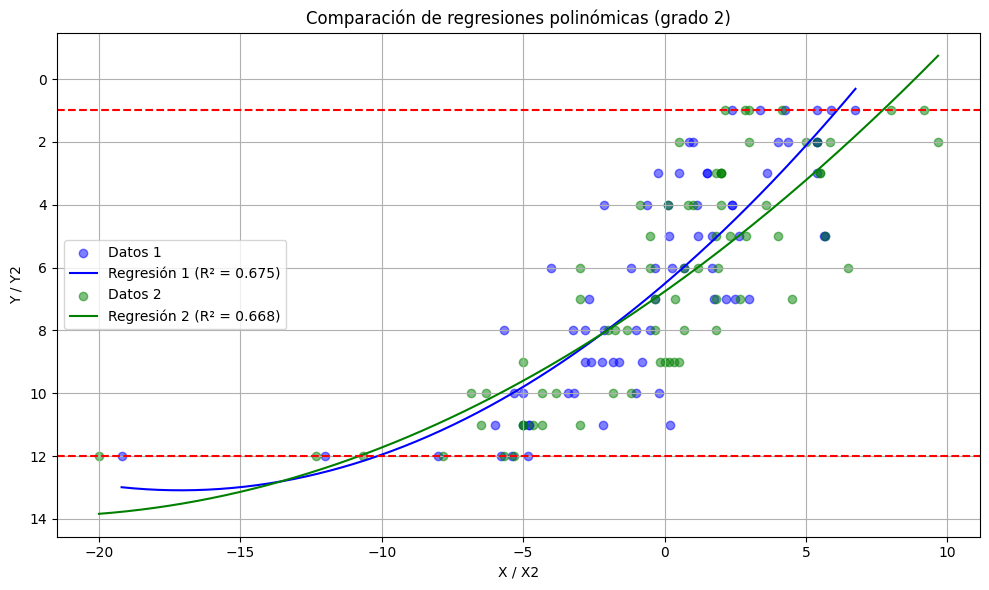

In [100]:
degree = 2

def print_polynomial_equation(model, poly):
    coefs = model.coef_
    intercept = model.intercept_
    terms = [f"{intercept:.4f}"]
    for i, coef in enumerate(coefs[1:], start=1):
        terms.append(f"{coef:.4f}·x^{i}")
    equation = " + ".join(terms)
    print(f"y = {equation}")

# Regresión 1 (x, y) 2004 - 2024
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))
model1 = LinearRegression().fit(X_poly, y)

r2_1 = model1.score(X_poly, y)
print(r2_1)

x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred1 = model1.predict(x_range_poly)

print_polynomial_equation(model1, poly)

# Regresión 2 (x2, y2) 1980 - 2000
X2_poly = poly.fit_transform(x2.reshape(-1, 1))
model2 = LinearRegression().fit(X2_poly, y2)

r2_2 = model2.score(X2_poly, y2)
print(r2_2)

x_range2 = np.linspace(x2.min(), x2.max(), 300).reshape(-1, 1)
x_range2_poly = poly.transform(x_range2)
y_pred2 = model2.predict(x_range2_poly)

print_polynomial_equation(model2, poly)

#Grafico de las regresiones
plt.figure(figsize=(10, 6))

# Datos y curvas
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos 1')
plt.plot(x_range, y_pred1, color='blue', label=f'Regresión 1 (R² = {r2_1:.3f})')

plt.scatter(x2, y2, color='green', alpha=0.5, label='Datos 2')
plt.plot(x_range2, y_pred2, color='green', label=f'Regresión 2 (R² = {r2_2:.3f})')

plt.xlabel("X / X2")
plt.ylabel("Y / Y2")
plt.axhline(y = 12, color='red', linestyle='dashed', xmax = 11)
plt.axhline(y = 1, color='red', linestyle='dashed', xmax = 11)
plt.title(f"Comparación de regresiones polinómicas (grado {degree})")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

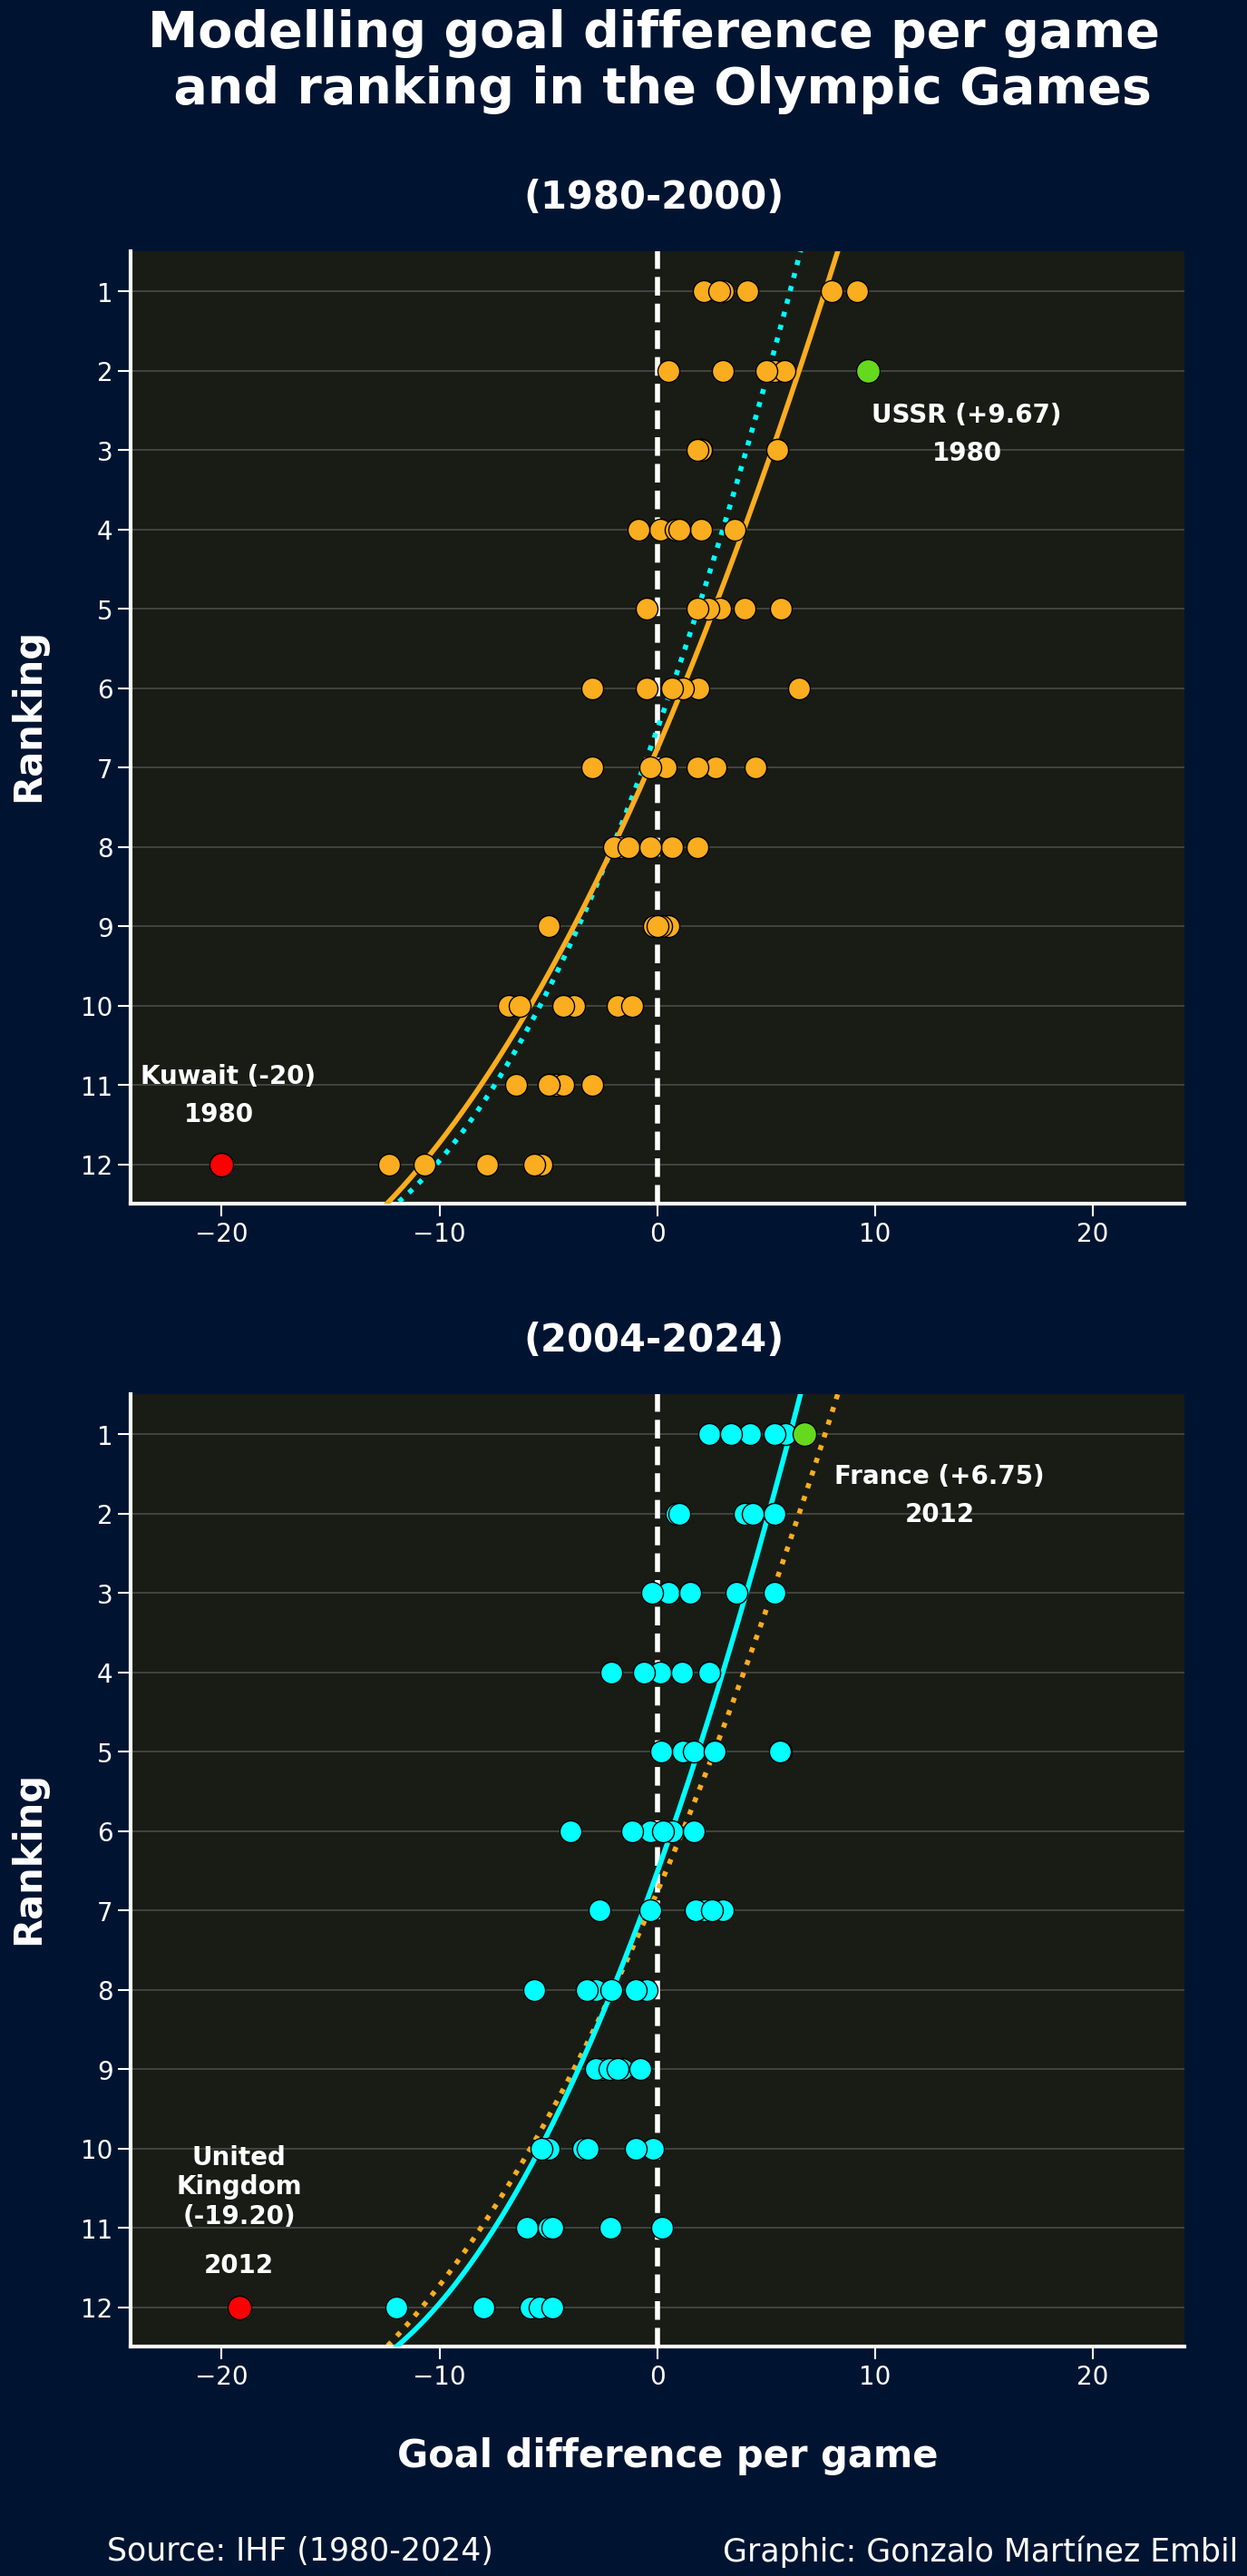

In [96]:
# Gráfico
fig, axs = plt.subplots(2,1)
fig.set_size_inches(15,30)
fig.set_facecolor('#001432')
axs[0].set_facecolor('#191c15')
axs[1].set_facecolor('#191c15')

# Puntos
axs[0].scatter(x2, y2, marker='o', color='#faad1e', label='1980-2000', edgecolors = 'black', linewidths = 1, s=300, zorder=4)
axs[1].scatter(x, y, marker='o', color='aqua', label='2000-2024', edgecolors = 'black', linewidths = 1, s=300, zorder=4)

# Línea de regresión
axs[0].plot(x_range2, y_pred2, color='#faad1e', label=f'Regresión 2 (R² = {r2_2:.3f})', linewidth=4, zorder=3)
axs[0].plot(x_range, y_pred1, color='aqua', label=f'Regresión 1 (R² = {r2_1:.3f})', linewidth=4, zorder=2, linestyle='dotted')
axs[1].plot(x_range2, y_pred2, color='#faad1e', label=f'Regresión 2 (R² = {r2_2:.3f})', linewidth=4, zorder=2, linestyle='dotted')
axs[1].plot(x_range, y_pred1, color='aqua', label=f'Regresión 1 (R² = {r2_1:.3f})', linewidth=4, zorder=3)

# Grid
axs[0].grid(axis='y', alpha=1, linewidth=0.25, color='white', zorder=1)
axs[1].grid(axis='y', alpha=1, linewidth=0.25, color='white', zorder=1)

# Ejes
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].set_yticks([i for i in range(1, 25)])
axs[1].set_yticks([i for i in range(1, 25)])
axs[0].set_ylim(12.5, 0.5)
axs[1].set_ylim(12.5, 0.5)
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

# Línea de corte
axs[0].axvline(x = 0, color='white', linestyle='dashed', ymax = 1, zorder=0, linewidth=4)
axs[0].axvline(x = 22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
axs[0].axvline(x = -22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
axs[1].axvline(x = 0, color='white', linestyle='dashed', ymax = 1, zorder=0, linewidth=4)
axs[1].axvline(x = 22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
axs[1].axvline(x = -22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)

# Label
axs[0].tick_params(colors='white', length=10, width=1.5, which='both')
axs[1].tick_params(colors='white', length=10, width=1.5, which='both')

# Borders
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom', 'left']:
  axs[0].spines[axis].set_color('white')
  axs[0].spines[axis].set_linewidth(3)
  axs[0].spines[axis].set_zorder(2)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom', 'left']:
  axs[1].spines[axis].set_color('white')
  axs[1].spines[axis].set_linewidth(3)
  axs[1].spines[axis].set_zorder(2)

# Puntos máximos
axs[0].scatter(9.67, 2,  marker='o', color='#65d91e', label='23/24', edgecolors = 'black', linewidths = 1, s=350, zorder=8)
fig.text(0.74, 0.82, 'USSR (+9.67)', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.74, 0.806, '1980', ha='center', va='center', fontsize=20, color='white', weight='bold')
axs[0].scatter(-20, 12,  marker='o', color='red', label='23/24', edgecolors = 'black', linewidths = 1, s=350, zorder=8)
fig.text(0.197, 0.577, 'Kuwait (-20)', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.19, 0.563, '1980', ha='center', va='center', fontsize=20, color='white', weight='bold')
axs[1].scatter(6.75, 1,  marker='o', color='#65d91e', label='23/24', edgecolors = 'black', linewidths = 1, s=350, zorder=8)
fig.text(0.72, 0.43, 'France (+6.75)', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.72, 0.416, '2012', ha='center', va='center', fontsize=20, color='white', weight='bold')
axs[1].scatter(-19.20, 12,  marker='o', color='red', label='23/24', edgecolors = 'black', linewidths = 1, s=350, zorder=8)
fig.text(0.205, 0.169, 'United\nKingdom\n(-19.20)', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.205, 0.14, '2012', ha='center', va='center', fontsize=20, color='white', weight='bold')

# Texto
fig.text(0.51,0.95, 'Modelling goal difference per game\n and ranking in the Olympic Games', ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.51,0.9, '(1980-2000)', ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.51,0.48, '(2004-2024)', ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.25, 0.035, 'Source: IHF (1980-2024)', ha='center', va='center', fontsize=25, color='white')
fig.text(0.52, 0.07, 'Goal difference per game', ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.75, 0.035, 'Graphic: Gonzalo Martínez Embil', ha='center', va='center', fontsize=25, color='white')
fig.text(0.05, 0.71, 'Ranking', rotation=90, ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.05, 0.29, 'Ranking', rotation=90, ha='center', va='center', fontsize=30, color='white', weight='bold')

fig.savefig('Modelling goal difference per game and ranking in the Olympic Games 2.png', dpi=200, bbox_inches='tight', pad_inches=0.5)

plt.show()